# Analisis Eksploratif Data Pokemon

Pada artikel ini, kita akan melakukan analisis eksploratif pada dataset `Pokemon`. `Pokemon`  merupakan dataset yang berisikan karakteristik pokemon seperti: nama pokemon, jenis pokemon, dan karakteristik kekuatan pokemon.

Kolom-kolom pada dataset tersebut, antara lain:

* `number` : nomor seri pokemon
*  `name` : nama pokemon
* `type` : jenis pokemon
* `total` : total nilai karakteristik serangan, kecepatan, *health point*, dan pertahanan pokemon
* `hp` : *health point*
* `attack` : Kekuatan serangan
* `defense` : kekuatan pertahanan
* `special_attack` : kekuatan serangan khusus
* `special_defense` : kekuatan pertahanan khusus
* `speed` : tingkat kecepatan

In [1]:
# Import Packages pandas, seaborn, matplotlib.pyplot, numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# import dataset (ganti ___ dengan perintah yang sesuai)
data = pd.read_csv("pokemon.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   number           1168 non-null   object
 1   name             1168 non-null   object
 2   type             1168 non-null   object
 3   total            1168 non-null   int64 
 4   hp               1168 non-null   int64 
 5   attack           1168 non-null   int64 
 6   defense          1168 non-null   int64 
 7   special_attack   1168 non-null   int64 
 8   special_defense  1168 non-null   int64 
 9   speed            1168 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 91.4+ KB


In [5]:
data.head()

,number,name,type,total,hp,attack,defense,special_attack,special_defense,speed
0,001,Bulbasaur,GRASS,318,45,49,49,65,65,45
1,001,Bulbasaur,POISON,318,45,49,49,65,65,45
2,002,Ivysaur,GRASS,405,60,62,63,80,80,60
3,002,Ivysaur,POISON,405,60,62,63,80,80,60
4,003,Venusaur,GRASS,525,80,82,83,100,100,80


## 1. Analisis Distribusi Data Numerik

Buatlah visualisasi sebuah data numerik yang ada pada dataset dan ceritakan hasil visualisasi yang muncul!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


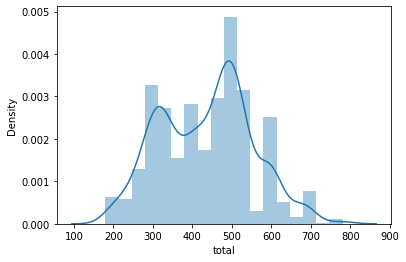

In [6]:
# visualisasi data dengan distplot
sns.distplot(data.total)
plt.show()

## 2. Analisis Korelasi dengan Scatterplot Matrices

Buatlah scatterplot matrices untuk melihat korelasi antar variabel numerik dan ceritakan temuan menarik yang anda temui! 

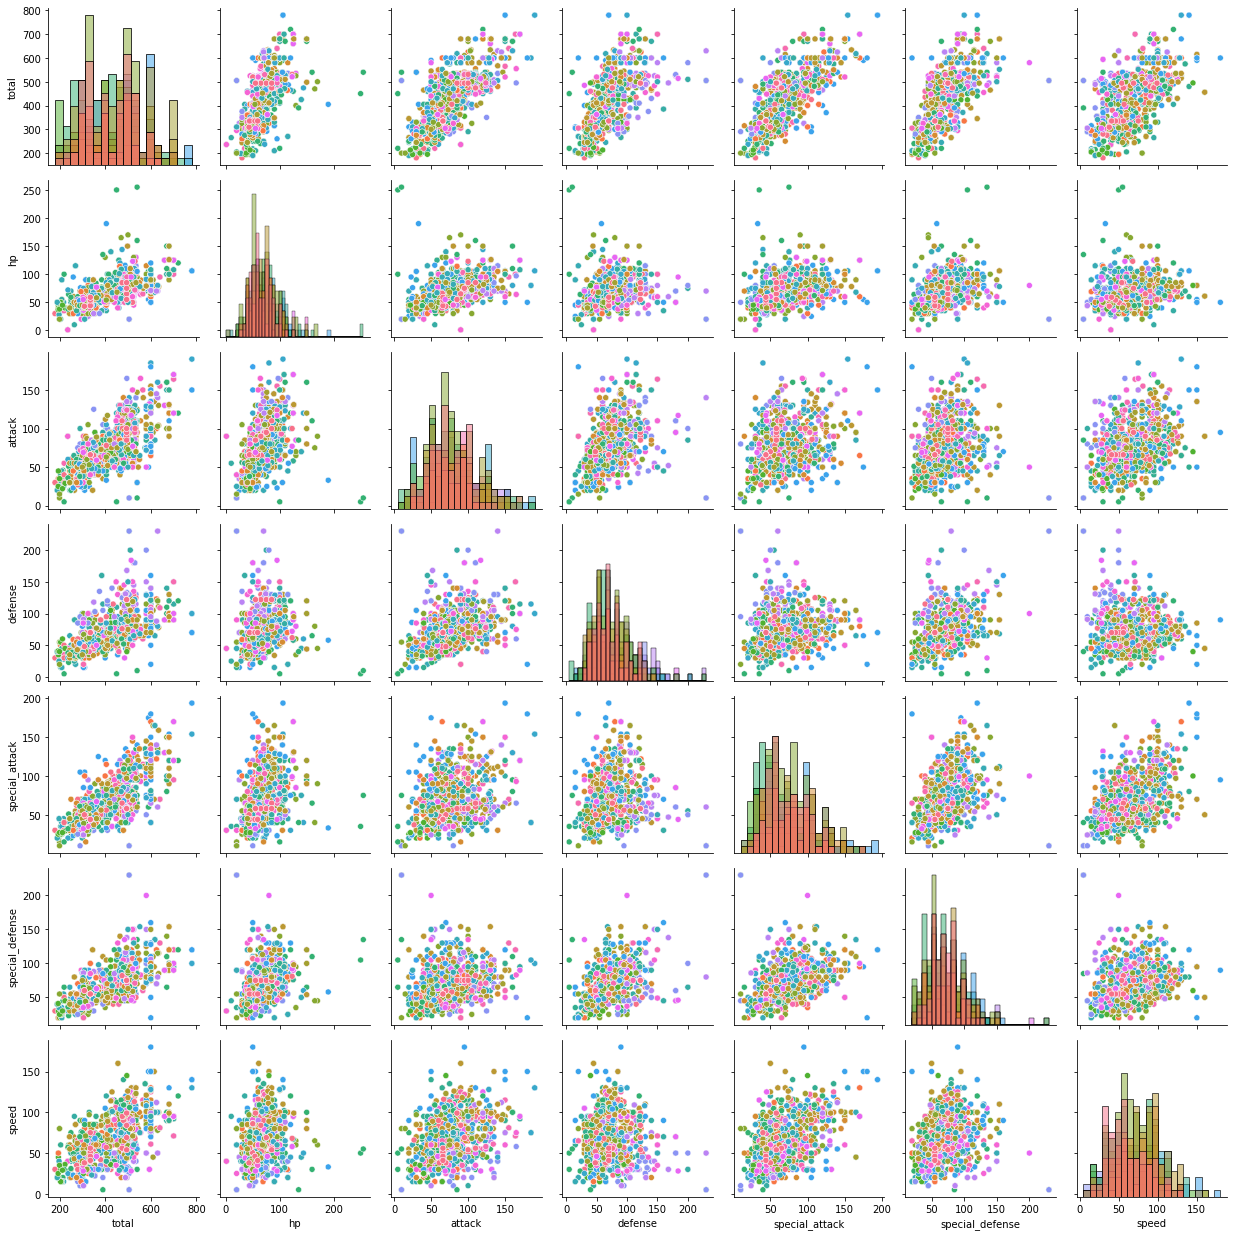

In [7]:
# visualisasi data dengan scatterplot matrices
g = sns.PairGrid(data, hue = 'type')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()


# 3. Analisis lainnya

Jawablah pertanyaan berikut dengan menggunakan sebuah code atau visualisasi data!

In [11]:
# Jenis Pokemon Terkuat
# Petunjuk: hitung rata-rata atau median attack pokemon pada masing-masin type
(data.groupby('type', as_index=False)['attack']
    .median()
    .sort_values("attack", ascending=False)
    .head()
)

,type,attack
2,DRAGON,100.0
5,FIGHTING,100.0
16,STEEL,90.0
1,DARK,90.0
15,ROCK,89.5


In [12]:
# Jenis Pokemon Tercepat
# Petunjuk: hitung rata-rata atau median speed pokemon pada masing-masin type
(data.groupby('type', as_index=False)['speed']
    .median()
    .sort_values("speed", ascending=False)
    .head()
)

,type,speed
3,ELECTRIC,86.0
7,FLYING,85.0
2,DRAGON,83.5
6,FIRE,80.0
14,PSYCHIC,73.0


In [16]:
# Pokemon Terlemah
# Petunjuk: 
#          1. Hitung nilai minimum attack
#          2. Gunakan nilai minimum tersebut untuk memfilter baris pada data
(data
    .sort_values("attack", ascending=True)
    .head()
)

,number,name,type,total,hp,attack,defense,special_attack,special_defense,speed
699,440,Happiny,NORMAL,220,100,5,5,15,65,30
175,113,Chansey,NORMAL,450,250,5,5,35,105,50
336,213,Shuckle,ROCK,505,20,10,230,10,230,5
199,129,Magikarp,WATER,200,20,10,55,15,20,80
335,213,Shuckle,BUG,505,20,10,230,10,230,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


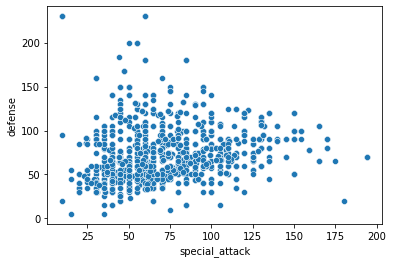

In [17]:
# Apakah Pokemon dengan Tingkat Serangan Spesial Tinggi akan Memiliki Tingkat Pertahanan yang Tinggi juga?
# Petunjuk: buatlah scatterplot untuk kolom-kolom yang sesuai
sns.scatterplot(data.special_attack, data.defense)
plt.show()

In [24]:
# Pokemon  dengan Tingkat Pertahanan Spesial Tertinggi tiap Jenisnya
# Petunjuk:
#          1. Operasi group berdasarkan kolom "type"
#          2. Lakukan left atau right join dengan dataset semula 
max_vals = (data.groupby(['type'], as_index=False)['special_defense']
    .max()
    .sort_values("special_defense", ascending=False)
)

pd.merge(max_vals, data, how = "left", on = ["type", "special_defense"]).loc[:,["type","special_defense","name"]]

,type,special_defense,name
0,BUG,230,Shuckle
1,ROCK,230,Shuckle
2,ICE,200,Regice
3,PSYCHIC,160,Deoxys- Defense Forme
4,FAIRY,154,Florges
5,FIRE,154,Ho-oh
6,FLYING,154,Lugia
7,FLYING,154,Ho-oh
8,DRAGON,150,Goodra
9,STEEL,150,Registeel


In [26]:
# Pokemon dengan Tingkat Serangan Spesial Tertinggi tiap Jenisnya
# Petunjuk:
#          1. Operasi group berdasarkan kolom "type"
#          2. Lakukan left atau right join dengan dataset semula 
max_vals = (data.groupby(['type'], as_index=False)['special_attack']
    .max()
    .sort_values("special_attack", ascending=False)
)

pd.merge(max_vals, data, how = "left", on = ["type", "special_attack"]).loc[:,["type","special_attack","name"]]

,type,special_attack,name
0,PSYCHIC,194,Mega Mewtwo Y
1,PSYCHIC,194,Mega Mewtwo Y
2,POISON,170,Mega Gengar
3,DRAGON,170,White Kyurem
4,GHOST,170,Mega Gengar
5,ICE,170,White Kyurem
6,ELECTRIC,165,Mega Ampharos
7,FAIRY,165,Mega Gardevoir
8,FIRE,159,Mega Charizard Y
9,FLYING,159,Mega Charizard Y
